## Using Random Forest to predict quality score between 0 and 10

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [25]:
#generate feature matrix and label vector

wine_df = pd.read_csv('https://raw.githubusercontent.com/pramirezx/WineQuality/main/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
#we have 11 features
feature_cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = wine_df[feature_cols]

In [27]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [28]:
#vector label
y = wine_df['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [29]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [30]:
#random forest
wine_RandomForest = RandomForestClassifier(n_estimators = 15, bootstrap=True,random_state=3)
wine_RandomForest.fit(X_train, y_train)
y_predict = wine_RandomForest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_predict)
print('Random Forest Accuracy:', accuracy_rf)


Random Forest Accuracy: 0.7125


In [31]:
y_predict_prob = wine_RandomForest.predict_proba(X_test)
print("probabilities,",y_predict_prob)

probabilities, [[0.         0.         0.86666667 0.13333333 0.         0.        ]
 [0.         0.06666667 0.66666667 0.26666667 0.         0.        ]
 [0.         0.13333333 0.         0.8        0.06666667 0.        ]
 ...
 [0.         0.         0.13333333 0.53333333 0.33333333 0.        ]
 [0.         0.         0.86666667 0.13333333 0.         0.        ]
 [0.         0.         0.33333333 0.6        0.06666667 0.        ]]


In [19]:
#finding roc curves for scores >= 5
fpr0, tpr0, thresh0 = roc_curve(y_test, y_predict_prob[:,1], pos_label=5)
fpr1, tpr1, thresh1 = roc_curve(y_test, y_predict_prob[:,1], pos_label=6)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_predict_prob[:,1], pos_label=7)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_predict_prob[:,1], pos_label=8)
# fpr2, tpr2, thresh2 = roc_curve(y_test, y_predict_prob[:,1], pos_label=9)
# fpr2, tpr2, thresh2 = roc_curve(y_test, y_predict_prob[:,1], pos_label=10)

In [20]:
AUC0 = auc(fpr0, tpr0)
print(AUC0)
AUC1 = auc(fpr1, tpr1)
print(AUC1)
AUC2 = auc(fpr2, tpr2)
print(AUC2)
AUC3 = auc(fpr3, tpr3)
print(AUC3)

0.5177808248450745
0.4780109226789308
0.4410402995289665
0.4676995798319328


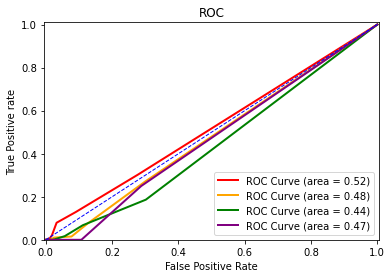

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(fpr0,tpr0,color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC0)
plt.plot(fpr1,tpr1,color='orange', lw=2, label='ROC Curve (area = %0.2f)' % AUC1)
plt.plot(fpr2,tpr2,color='green', lw=2, label='ROC Curve (area = %0.2f)' % AUC2)
plt.plot(fpr3,tpr3,color='purple', lw=2, label='ROC Curve (area = %0.2f)' % AUC3)
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()